In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
train=pd.read_excel("/content/drive/My Drive/train.xlsx")
test=pd.read_excel("/content/drive/My Drive/test.xlsx")

In [3]:
train.head()

,x01,a08a01,a08a02,k_a08a_1,k_a08a_2,k_a08a_3,k_a08a_4,k_a08a_5,fix
0,100202,47,4311,大潤發總公司,大賣場,會計部,會計,總計發票,0
1,100221,47,5140,台灣資生堂股份有限公司,化粧品販售,無,美容顧問,販售化粧品丶護膚,0
2,100401,26,7993,宏偉科技,Ic加工,品管,無,檢查完成品,0
3,100411,56,5296,台灣第一家塩酥雞,食物,無,無,炸料收錢,0
4,100421,47,5220,统一超商,零售日用品,無,店員,收銀排貨售貨,0


In [5]:
!pip install -U ckiptagger[tfgpu,gdown]
from ckiptagger import data_utils
data_utils.download_data_gdown("./")

     |████████████████████████████████| 320.4MB 54kB/s 


Downloading...
From: https://drive.google.com/uc?id=1efHsY16pxK0lBD2gYCgCTnv1Swstq771
To: /content/data.zip
1.88GB [00:40, 46.0MB/s]


In [6]:
from ckiptagger import WS, POS, NER
pos = POS("./data")
ws = WS("./data")

In [7]:
train=train.drop("fix",axis=1)
test=test.drop("fix",axis=1)

In [8]:
import re
def remove_punctuation(line):
    rule = re.compile(r"[^0-9丶()a-zA-Z\u4e00-\u9fa5]")
    line = rule.sub('',line)
    return line
for i in ["1","2","3","4","5"]:
    train["k_a08a_"+i]=train["k_a08a_"+i].replace("無","").apply(remove_punctuation)
    train["k_a08a_"+i]=train["k_a08a_"+i].replace("不知道","").apply(remove_punctuation)
    test["k_a08a_"+i]=test["k_a08a_"+i].replace("無","").apply(remove_punctuation)
    test["k_a08a_"+i]=test["k_a08a_"+i].replace("不知道","").apply(remove_punctuation)
train["k_a08a_4"]=train["k_a08a_4"].apply(lambda x:x.replace("闆","板"))
test["k_a08a_4"]=test["k_a08a_4"].apply(lambda x:x.replace("闆","板"))
train["k_a08a_3"]=train["k_a08a_3"].apply(lambda x:x.replace("部",""))
test["k_a08a_3"]=test["k_a08a_3"].apply(lambda x:x.replace("部",""))
train["k_a08a_3"]=train["k_a08a_3"].apply(lambda x:x.replace("課",""))
test["k_a08a_3"]=test["k_a08a_3"].apply(lambda x:x.replace("課",""))

In [9]:
train["k_a08a_1"]=train["k_a08a_1"].apply(lambda x:x.replace("股份有限公司",""))
test["k_a08a_1"]=test["k_a08a_1"].apply(lambda x:x.replace("股份有限公司",""))
train["k_a08a_1"]=train["k_a08a_1"].apply(lambda x:x.replace("有限公司",""))
test["k_a08a_1"]=test["k_a08a_1"].apply(lambda x:x.replace("有限公司",""))
train["k_a08a_1"]=train["k_a08a_1"].apply(lambda x:x.replace("總公司",""))
test["k_a08a_1"]=test["k_a08a_1"].apply(lambda x:x.replace("總公司",""))
train["k_a08a_1"]=train["k_a08a_1"].apply(lambda x:x.replace("分公司",""))
test["k_a08a_1"]=test["k_a08a_1"].apply(lambda x:x.replace("分公司",""))
train["k_a08a_1"]=train["k_a08a_1"].apply(lambda x:x.replace("股公司",""))
test["k_a08a_1"]=test["k_a08a_1"].apply(lambda x:x.replace("股公司",""))
train["k_a08a_1"]=train["k_a08a_1"].apply(lambda x:x.replace("公司",""))
test["k_a08a_1"]=test["k_a08a_1"].apply(lambda x:x.replace("公司",""))
train["k_a08a_1"]=train["k_a08a_1"].apply(lambda x:x.replace("企業社",""))
test["k_a08a_1"]=test["k_a08a_1"].apply(lambda x:x.replace("企業社",""))
train["k_a08a_1"]=train["k_a08a_1"].apply(lambda x:x.replace("企業",""))
test["k_a08a_1"]=test["k_a08a_1"].apply(lambda x:x.replace("企業",""))
train["word cut1"]=train["k_a08a_1"].apply(lambda x:ws([x]))
test["word cut1"]=test["k_a08a_1"].apply(lambda x:ws([x]))

In [10]:
train["pos1"]=train["word cut1"].apply(lambda x:pos(x))
test["pos1"]=test["word cut1"].apply(lambda x:pos(x))

In [11]:
#for i in range(len(train)):
  #print(train["pos1"].iloc[i],train["word cut1"].iloc[i])
#Choose tag type eqals to "Na" or "Nc"

In [12]:
'''
Here I used name entity recognition to acquire some unrelated entity types
such as 
GPE:Countries, cities, states
LOC:Non-GPE locations, mountain ranges, bodies of water
ORDINAL:“first”, “second”
MONEY:Monetary values, including unit
'''
drop_list=['台灣',
 '第一',
 '高雄',
 '台灣',
 '第一',
 '台灣',
 '台灣',
 '泰式',
 '長春',
 '新竹',
 '台灣',
 '中港',
 '南港',
 '台灣',
 '台灣',
 '彰化縣',
 '北誠',
 '四週',
 '春天',
 '新北市',
 '永康',
 '美商',
 '基隆廟口',
 '台灣',
 '第六',
 '第一',
 '哥倫比亞',
 '第四十二',
 '富春',
 '台灣',
 '亞太',
 '台灣',
 '英屬',
 '台灣',
 '法國',
 '台中',
 '台灣',
 '基隆市',
 '台灣',
 '韓國',
 '台北市',
 '一年多',
 '桃園市',
 '西式',
 '台灣',
 '東市',
 '桃園市',
 '九月',
 '台中',
 '華盛頓',
 '台中',
 '第七',
 '中國',
 '台中商圈',
 '台中市東勢區',
 '第六',
 '豐原',
 '美商',
 '三天',
 '億元',
 '中式',
 '南投縣',
 '後壁',
 '白河區',
 '台南市',
 '白河',
 '日式',
 '吉賀',
 '臺灣',
 '台灣',
 '桃園市',
 '桃園市',
 '台北',
 '第一',
 '新北市',
 '義大利',
 '第四',
 '埔心鄉',
 '桃園市',
 '雲林縣長',
 '台南',
 '上海',
 '蘇州',
 '杭州',
 '關廟',
 '基隆',
 '基隆',
 '義大利',
 '台中',
 '第一',
 '台灣',
 '第一',
 '台灣',
 '第五',
 '嘉義',
 '亞太',
 '蘇伊士',
 '南亞',
 '南亞',
 '寧波',
 '中國',
 '日式',
 '第一',
 '太平洋',
 '泰國',
 '台北',
 '台中市',
 '中華',
 '義大利',
 '三重',
 '台灣',
 '華林',
 '春天',
 '春天',
 '板橋區',
 '九份',
 '台灣',
 '十元',
 '聚典',
 '桃園市',
 '第一',
 '中國',
 '台灣',
 '桃園市',
 '南陵',
 '英國',
 '中西',
 '花東',
 '中式',
 '豐原',
 '台灣',
 '塩水',
 '明鎮',
 '東山地區',
 '舒帛',
 '五天',
 '華東',
 '茄渼',
 '高雄',
 '台北',
 '台灣',
 '中國',
 '興美',
 '中壢']

drop_list=list(set(drop_list))

In [13]:
import numpy as np
train["feature"]=train['k_a08a_2']+train['k_a08a_3']+train['k_a08a_4']+train['k_a08a_5']
train=train[train['feature'].notna()]

test["feature"]=test['k_a08a_2']+test['k_a08a_3']+test['k_a08a_4']+test['k_a08a_5']
test["feature"]=test["feature"].replace(np.nan, "nan")

In [14]:
import jieba
import jieba.analyse
from gensim.models import Word2Vec
def pad4(x):
    if len(x)==0:
        x=["nan","nan","nan","nan","nan"]
    init=0
    while len(x)<5:
        x.append(x[init])
        init+=1
    return x

train["key_info"]=train["feature"].apply(lambda x:jieba.analyse.extract_tags(x, topK=5))
train["key_info"]=train["key_info"].apply(pad4)
test["key_info"]=test["feature"].apply(lambda x:jieba.analyse.extract_tags(x, topK=5))
test["key_info"]=test["key_info"].apply(pad4)
voc=list(train["key_info"])+list(test["key_info"])


mymodel = Word2Vec(voc*2,size=200, min_count=2,workers=4,sg=1)
mymodel.save("modelnew")
def w2v_vector(text_list):
    new=[]
    for word in text_list:
        new=new+list(mymodel[word])
    new=np.array(new,dtype=float)
    return new
train["answer"]=train["key_info"].apply(w2v_vector)
test["answer"]=test["key_info"].apply(w2v_vector)

Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
Loading model cost 0.735 seconds.
Prefix dict has been built successfully.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


In [15]:
train["word cut2"]=train["feature"].apply(lambda x:ws([x]))
test["word cut2"]=test["feature"].apply(lambda x:ws([x]))
train["pos2"]=train["word cut2"].apply(lambda x:pos(x))
test["pos2"]=test["word cut2"].apply(lambda x:pos(x))

In [16]:
import itertools
flatten = itertools.chain.from_iterable
#list(flatten(l))
remove_tag=[
"Nb",
"Neu",
"Caa",
"Cab",
"Cba",
"Cbb",
"P",
"DE",
"D",
"VH",
"Da",
"Dfa",
"Dfb",
"Di",
"Dk",
"DM",
"V_2",
"SHI"
]

In [17]:
clean_word=[]
for i in range(len(train)):
    f1=list(flatten(train["word cut1"].iloc[i]))
    p1=list(flatten(train["pos1"].iloc[i]))
    f2=list(flatten(train["word cut2"].iloc[i]))
    p2=list(flatten(train["pos2"].iloc[i]))

    c1=[]
    for i in range(len(p1)):
        if p1[i]  in ["Na","Nc"]:
            if f1[i] not in drop_list:
                c1.append(f1[i])
    for i in range(len(p2)):
        if p2[i] not in remove_tag:
            if f2[i] not in drop_list:
                c1.append(f2[i])
    clean_word.append(c1)

train["clean_word"]=clean_word  

clean_word=[]
for i in range(len(test)):
    f1=list(flatten(test["word cut1"].iloc[i]))
    p1=list(flatten(test["pos1"].iloc[i]))
    f2=list(flatten(test["word cut2"].iloc[i]))
    p2=list(flatten(test["pos2"].iloc[i]))

    c1=[]
    for i in range(len(p1)):
        if p1[i]  in ["Na","Nc"]:
            if f1[i] not in drop_list:
                c1.append(f1[i])
    for i in range(len(p2)):
        if p2[i] not in remove_tag:
            if f2[i] not in drop_list:
                c1.append(f2[i])
    
    clean_word.append(c1)

test["clean_word"]=clean_word 

In [18]:
temp=pd.concat([train["clean_word"],test["clean_word"]],axis=0)

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
def dummy(data):
    return str(data)
vectorizer =TfidfVectorizer(preprocessor=dummy)
tfidf1 = vectorizer.fit_transform(temp)
print(tfidf1.shape)
n_components = 3000
tsvd = TruncatedSVD(n_components=n_components)
tsvd_result = tsvd.fit_transform(tfidf1)
explained_variance = tsvd.explained_variance_ratio_.sum()
# The svd explains only a tiny portion of the variance
print("Explained variance %f" % (explained_variance))
print(tsvd_result.shape)
train["tsvd_result1"]=list(tsvd_result)[:3200]
test["tsvd_result1"]=list(tsvd_result)[3200:]

(3943, 5508)
Explained variance 0.993682
(3943, 3000)


In [28]:
new_train=[]
for i in range(len(train)):
    a1=train["answer"][i]
    a1=list(a1)+list(train["tsvd_result1"][i])
    new_train.append(a1)

new_test=[]
for i in range(len(test)):
    a1=test["answer"][i]
    a1=list(a1)+list(test["tsvd_result1"][i])
    new_test.append(a1)
    
print(np.array(new_train).shape)
print(np.array(new_test).shape)

(3200, 4000)
(743, 4000)


In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [30]:
train["a08a02"]=train["a08a02"].astype('category')
train["a08a01"]=train["a08a01"].astype('category')

In [31]:
import numpy as np
from imblearn.over_sampling import SMOTE
X_train, X_test, Y_train, Y_test = train_test_split(new_train, np.array(train["a08a01"]), test_size=0.1, random_state=1,stratify=np.array(train["a08a01"]),shuffle=True)

sm = SMOTE(random_state=12,k_neighbors=5)
X_train_res, Y_train_res = sm.fit_sample(list(X_train), Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

In [32]:
forest1 = LogisticRegression(random_state=1,max_iter=1000,C=10000)
forest1.fit(X_train_res, Y_train_res)
Y_pred = forest1.predict(list(X_test))
Y_train_pred=forest1.predict(list(X_train))
print('Accuracy (forest): %.5f' % accuracy_score(Y_train, Y_train_pred))
print('Accuracy (forest): %.5f' % accuracy_score(Y_test, Y_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuracy (forest): 0.99931
Accuracy (forest): 0.67500


In [33]:
x_train, x_test, y_train, y_test = train_test_split(new_train, np.array(train["a08a02"]), test_size=0.1, random_state=1,stratify=np.array(train["a08a01"]),shuffle=True)
sm = SMOTE(random_state=12,k_neighbors=5)
x_train_res, y_train_res = sm.fit_sample(list(x_train), y_train)


forest2 = LogisticRegression(random_state=0,max_iter=1000,C=10000)
forest2.fit(x_train_res, y_train_res)
y_pred = forest2.predict(list(x_test))
y_train_pred=forest2.predict(list(x_train))
print('Accuracy (forest): %.5f' % accuracy_score(y_train, y_train_pred))
print('Accuracy (forest): %.5f' % accuracy_score(y_test, y_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

Accuracy (forest): 0.99965
Accuracy (forest): 0.63438


In [47]:
final_score=(0.67500+0.63438)/2
print("My final score=%.5f" %final_score)

My final score=0.65469


**It was not an easy problem;however,by trial and error,my final score in testing data is above simple baseline in the end.**


<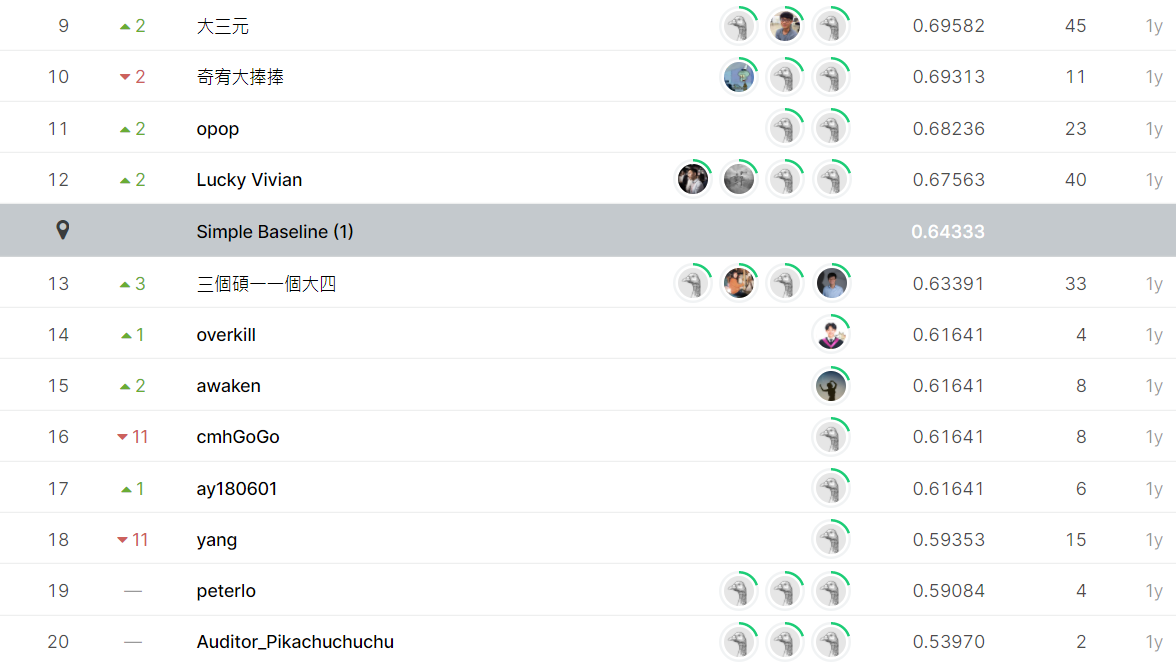